# 数据集：Wine Reviews

## 3120211002 高威

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score

### 1.数据预处理

### 1.1读取数据集

In [2]:
dataset = pd.read_csv('winemag-data_first150k.csv')
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### 1.2查看数据的缺失值，并将每列的缺失值数量按降序排列

In [3]:
dataset.isnull().sum().sort_values(ascending=False)

region_2       89977
designation    45735
region_1       25060
price          13695
country            5
province           5
Unnamed: 0         0
description        0
points             0
variety            0
winery             0
dtype: int64

从运行结果可以看出，数据集中有6列存在空缺项。

### 1.3数据缺失处理

按照不同的标准处理空值:

·region_1:删除空值所在行
  
·price:取平均数
  
·province:取众数
  
·其他：NA->'N.A'

In [4]:
dataset.drop(labels = 'region_1', axis = 1, inplace=True)

In [5]:
dataset.fillna(value = {'price': dataset['price'].mean()}, inplace = True)

In [6]:
dataset.fillna(value = {'province': dataset['province'].mode()[0]}, inplace = True)

In [7]:
dataset.fillna({'country' : 'N.A', 'designation' : 'N. A.', 'region_2' : 'N.A'}, inplace = True)

In [8]:
dataset.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_2       0
variety        0
winery         0
dtype: int64

从新的运行结果可以看出，空值已处理完毕。

### 1.4查看处理后的数据集的5数情况

In [9]:
dataset.describe(include = 'all')

,Unnamed: 0,country,description,designation,points,price,province,region_2,variety,winery
count,150930.000000,150930,150930,150930,150930.000000,150930.000000,150930,150930,150930,150930
unique,NaN,49,97821,30622,NaN,NaN,455,19,632,14810
top,NaN,US,A little bit funky and unsettled when you pop ...,N. A.,NaN,NaN,California,N.A,Chardonnay,Williams Selyem
freq,NaN,62397,6,45735,NaN,NaN,44513,89977,14482,374
mean,75464.500000,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN
std,43569.882402,NaN,NaN,NaN,3.222392,34.635438,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN
25%,37732.250000,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN
50%,75464.500000,NaN,NaN,NaN,88.000000,26.000000,NaN,NaN,NaN,NaN
75%,113196.750000,NaN,NaN,NaN,90.000000,38.000000,NaN,NaN,NaN,NaN


## 2.可视化部分

### 2.1 例-来自不同国家的葡萄酒数量（使用直方图）

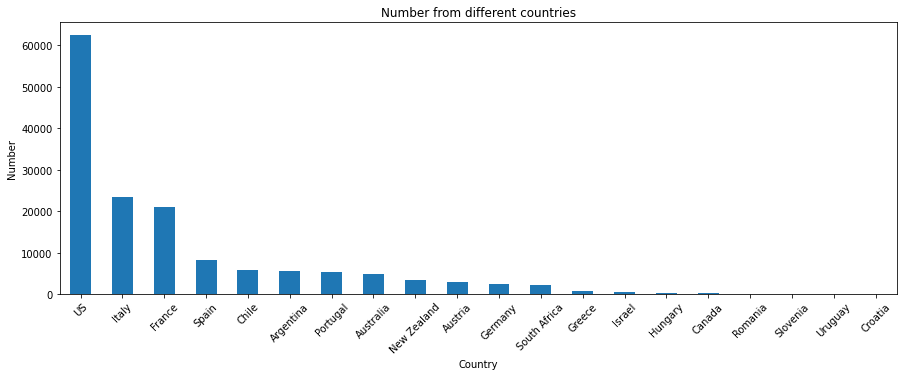

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


In [10]:
def show_countries():
    countries = dataset.groupby('country').country.count().sort_values(ascending = False)
    
    plt.figure(figsize = (15, 5))
    ax = countries.head(20).plot(kind = 'bar')
    ax.set_title('Number from different countries')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number')
    plt.xticks(rotation = 45)
    plt.show()
    
    return countries

show_countries()

### 2.1 例-价格与评分关系（使用盒图）

<AxesSubplot:xlabel='points', ylabel='price'>

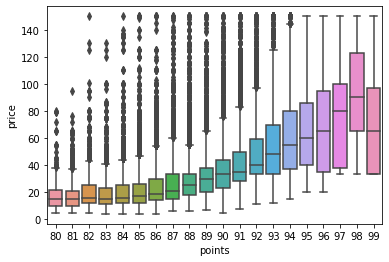

In [11]:
a=dataset[(dataset.price<=150)&(dataset.points<100)]
sns.boxplot(x='points',y='price',data=a)

##   可视化地对比空值处理之前（此处为处理之前图）

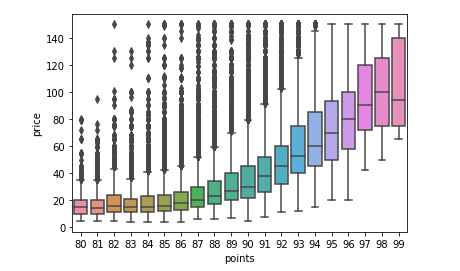